I want to see if there is a  positive correlation between the danceability of a song and its valence, in song with a speechiness over 0.33 ( considering that a value above 0.66 the song is made of spoken words, a value between 0.33 and 0.66 it contains music and words, under 0.33 it contains only instrument). I suppose that the higher is the danceability, the higher is the valence of the song (the song is considered happier and euphoric). I also suppose that there is a negative correlation between danceability and speechiness; the higher the danceability, the lower the speechiness (less words in the song).

# 1.&nbsp;Data Importing

In [48]:
import pandas as pd
import numpy as np
data = pd.read_csv("data.csv")


# 2.&nbsp;Data Cleaning (overview)

In [41]:
print(data)

      Unnamed: 0  acousticness  danceability  duration_ms  energy  \
0              0       0.01020         0.833       204600   0.434   
1              1       0.19900         0.743       326933   0.359   
2              2       0.03440         0.838       185707   0.412   
3              3       0.60400         0.494       199413   0.338   
4              4       0.18000         0.678       392893   0.561   
...          ...           ...           ...          ...     ...   
2012        2012       0.00106         0.584       274404   0.932   
2013        2013       0.08770         0.894       182182   0.892   
2014        2014       0.00857         0.637       207200   0.935   
2015        2015       0.00164         0.557       185600   0.992   
2016        2016       0.00281         0.446       204520   0.915   

      instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0             0.021900    2    0.1650    -8.795     1       0.4310  150.062   
1            

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [4]:
print(data.describe())

        Unnamed: 0  acousticness  danceability   duration_ms       energy  \
count  2017.000000   2017.000000   2017.000000  2.017000e+03  2017.000000   
mean   1008.000000      0.187590      0.618422  2.463062e+05     0.681577   
std     582.402066      0.259989      0.161029  8.198181e+04     0.210273   
min       0.000000      0.000003      0.122000  1.604200e+04     0.014800   
25%     504.000000      0.009630      0.514000  2.000150e+05     0.563000   
50%    1008.000000      0.063300      0.631000  2.292610e+05     0.715000   
75%    1512.000000      0.265000      0.738000  2.703330e+05     0.846000   
max    2016.000000      0.995000      0.984000  1.004627e+06     0.998000   

       instrumentalness          key     liveness     loudness         mode  \
count       2017.000000  2017.000000  2017.000000  2017.000000  2017.000000   
mean           0.133286     5.342588     0.190844    -7.085624     0.612295   
std            0.273162     3.648240     0.155453     3.761684     0.

In [6]:
print(data["danceability"].value_counts())

#An higher danceability is around 1.00, a lower danceability is around 0
#the mean of danceability seems in the middle

0.683    12
0.760    11
0.704    11
0.646    10
0.614    10
         ..
0.334     1
0.860     1
0.363     1
0.643     1
0.904     1
Name: danceability, Length: 632, dtype: int64


In [7]:
print(data["valence"].value_counts())
#It seems that the higher number of the songs are negative(sad)

0.160    9
0.372    9
0.331    8
0.769    8
0.520    8
        ..
0.795    1
0.610    1
0.076    1
0.282    1
0.623    1
Name: valence, Length: 853, dtype: int64


# 3.&nbsp;Data Cleaning (interpretability)

# 4.&nbsp;Data Cleaning (reduction)

In [49]:
#remove non interesting columns
data = data.drop(["Unnamed: 0", "target", "acousticness", "energy", "key", "mode", "time_signature"], axis = 1)
print(data)

      danceability  duration_ms  instrumentalness  liveness  loudness  \
0            0.833       204600          0.021900    0.1650    -8.795   
1            0.743       326933          0.006110    0.1370   -10.401   
2            0.838       185707          0.000234    0.1590    -7.148   
3            0.494       199413          0.510000    0.0922   -15.236   
4            0.678       392893          0.512000    0.4390   -11.648   
...            ...          ...               ...       ...       ...   
2012         0.584       274404          0.002690    0.1290    -3.501   
2013         0.894       182182          0.001670    0.0528    -2.663   
2014         0.637       207200          0.003990    0.2140    -2.467   
2015         0.557       185600          0.677000    0.0913    -2.735   
2016         0.446       204520          0.000039    0.2180    -6.221   

      speechiness    tempo  valence                            song_title  \
0          0.4310  150.062    0.286           

# 5.&nbsp;Data Cleaning (noisy data)

In [50]:
#remove speechiness under 0.33

data = data[data["speechiness"] > 0.33]     
print(data)


      danceability  duration_ms  instrumentalness  liveness  loudness  \
0            0.833       204600          0.021900     0.165    -8.795   
8            0.603       202853          0.000000     0.342    -3.626   
22           0.854       287086          0.000000     0.527    -8.553   
26           0.411       199500          0.000001     0.198    -6.889   
44           0.640       234526          0.000000     0.156    -4.108   
...            ...          ...               ...       ...       ...   
1977         0.947       150152          0.000000     0.280    -5.337   
1978         0.466       183484          0.000000     0.315    -6.105   
2002         0.583       224092          0.000003     0.129    -3.495   
2004         0.595       198400          0.000000     0.102    -2.339   
2012         0.584       274404          0.002690     0.129    -3.501   

      speechiness    tempo  valence                           song_title  \
0           0.431  150.062    0.286            

# 6.&nbsp;Data Cleaning (completeness)

In [51]:
#checking if there are null rows
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 0 to 2012
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      78 non-null     float64
 1   duration_ms       78 non-null     int64  
 2   instrumentalness  78 non-null     float64
 3   liveness          78 non-null     float64
 4   loudness          78 non-null     float64
 5   speechiness       78 non-null     float64
 6   tempo             78 non-null     float64
 7   valence           78 non-null     float64
 8   song_title        78 non-null     object 
 9   artist            78 non-null     object 
dtypes: float64(7), int64(1), object(2)
memory usage: 6.7+ KB


# 7.&nbsp;Data Exploring


In [52]:
#checking how many songs there are with high valence and sorting them for danceability
data_danceability = data[(data["valence"] > 0.50)]
data_danceability.sort_values("danceability", axis = 0, ascending = True)

,danceability,duration_ms,instrumentalness,liveness,loudness,speechiness,tempo,valence,song_title,artist
1196,0.352,216893,0.000000,0.0883,-7.983,0.482,165.290,0.716,Like A G6,Far East Movement
310,0.403,274480,0.000000,0.4180,-5.889,0.338,90.336,0.734,Auditorium,Mos Def
26,0.411,199500,0.000001,0.1980,-6.889,0.383,110.016,0.598,Lose My Mind,A-Trak
1218,0.427,257760,0.000000,0.2770,-4.874,0.376,161.776,0.581,Best I Ever Had,Drake
669,0.432,262857,0.000000,0.7790,-3.845,0.332,187.302,0.675,"U.O.E.N.O. Remix (feat. Future, Wiz Khalifa)",Rocko
314,0.446,241800,0.000000,0.1280,-6.088,0.368,96.318,0.585,Sometimes,Heems
1436,0.466,16588,0.000000,0.4580,-3.545,0.385,113.457,0.598,dance alot,Various Artists
1425,0.501,269720,0.000000,0.2110,-6.248,0.436,85.929,0.615,Powers That Be,Rick Ross
1410,0.504,239320,0.000000,0.1280,-8.205,0.364,175.483,0.564,Wet Dreamz,J. Cole
1932,0.514,254027,0.000000,0.7750,-2.027,0.410,161.109,0.614,Survivor,Destiny's Child


# 8.&nbsp;Data Analysis

In [53]:
#checking correlation between danceability and speechiness and between danceability and valence
#I expect a positive one between danceability and valence and a negative one between danceability and speechiness 
data.corr()

<ipython-input-53-f6c7538a8a54>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,danceability,duration_ms,instrumentalness,liveness,loudness,speechiness,tempo,valence
danceability,1.000000,0.012714,0.086885,-0.181289,-0.367822,-0.143650,-0.060276,-0.069389
duration_ms,0.012714,1.000000,-0.008432,0.115418,-0.222588,0.135642,-0.115816,-0.108032
instrumentalness,0.086885,-0.008432,1.000000,-0.071494,-0.049499,-0.128555,-0.134597,-0.345743
liveness,-0.181289,0.115418,-0.071494,1.000000,0.126498,0.004871,-0.133690,0.100013
loudness,-0.367822,-0.222588,-0.049499,0.126498,1.000000,-0.141074,0.156803,0.023160
speechiness,-0.143650,0.135642,-0.128555,0.004871,-0.141074,1.000000,0.213247,0.099399
tempo,-0.060276,-0.115816,-0.134597,-0.133690,0.156803,0.213247,1.000000,0.097917
valence,-0.069389,-0.108032,-0.345743,0.100013,0.023160,0.099399,0.097917,1.000000


I did not find any correlation between danceability and avalence or speechiness. Also the other variables seem to don't have a significant correlation between them.

# 9.&nbsp;Data Visualization

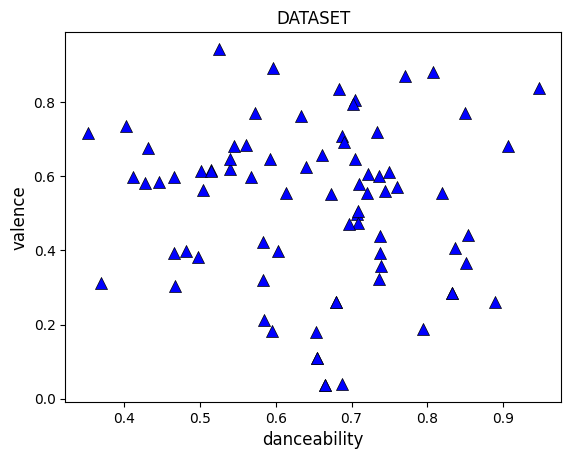

In [58]:
import matplotlib.pyplot as plt
x = data["danceability"]
y = data["valence"]

plt.scatter(x, y, c="blue",
            linewidths = 0.5,
            marker = "^",
            edgecolor = "black",
            s = 75)
plt.xlabel("danceability", fontsize=12)
plt.ylabel("valence", fontsize=12)
plt.title("DATASET", fontsize =12)
plt.show()

#no correlation

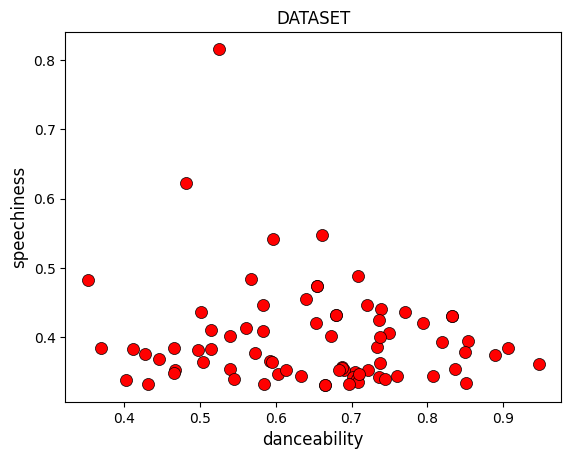

In [60]:
x = data["danceability"]
y = data["speechiness"]

plt.scatter(x, y, c="red",
            linewidths = 0.5,
            marker = "o",
            edgecolor = "black",
            s = 75)
plt.xlabel("danceability", fontsize=12)
plt.ylabel("speechiness", fontsize=12)
plt.title("DATASET", fontsize =12)
plt.show()

# 10.&nbsp;Data Exporting

In [61]:
data.to_csv("spotify_data.csv", header = True, index = False)
